# Data Cleaning and Sorting
The goal of this section is to import the raw data from the experiment, check it for errors, convert it to a more readable format and then export that data to a new file for later use and storage.  

## Import the Data
Data was collected via a survey in Google Forms ([link](https://docs.google.com/forms/d/e/1FAIpQLScREfhTiPqMwQLZ-XsUYUHF3L7s-LemZivaJv6_3uhFI8_K6Q/viewform?usp=sf_link)) and the data is stored in an open access Google Sheet. ([link](https://docs.google.com/spreadsheets/d/11fNLn7-7c9rlHEPKpTqid2YDDLQVBW_QTY4EYnlaYXQ/edit?usp=sharing)) This sheet is available for you to download and use for your own research. 

The first thing to do is import the data into a pandas dataframe.

In [1]:
import pandas as pd
response = pd.read_excel("Demographic Information.xlsx", sheet_name="Form Responses 2")
demographic = pd.read_excel("Demographic Information.xlsx", sheet_name="Form Responses 1")

### Initial check
Does the data load into the dataframe?

In [2]:
response.head()

,Timestamp,User ID#,Method used for Test,Round 1,Round 2,Round 3,Round 4,Round 5
0,2021-11-18 16:28:13.837,4973,Mouse,0.325000,0.267000,0.301000,0.229,0.267000
1,2021-11-18 16:28:51.866,4973,Spacebar,0.331990,0.232999,0.267000,0.231,0.300000
2,2021-11-18 16:29:36.305,4973,Touchscreen,0.298999,0.265990,0.290000,0.266,0.298999
3,2021-11-19 00:04:49.433,3007,Mouse,0.362000,0.322000,0.362000,0.329,0.329000
4,2021-11-19 00:06:10.527,3007,Spacebar,0.328999,0.331000,0.296999,0.331,0.269990


In [3]:
demographic.head()

,Timestamp,What is your biological sex,What gender do you identify as?,Ethnicity,How old are you?,How familiar are you with technology?,"Please enter a 4 digit, User ID between 1000 and 9999"
0,2021-11-18 16:27:23.791,Male,Male,Black or African American,15-24,10,4973
1,2021-11-19 00:09:51.197,Male,Male,Asian,25-44,10,3007
2,2021-11-21 16:59:09.298,Male,Male,Hispanic or Latino,25-44,10,5678
3,2021-11-21 17:07:57.382,Female,Female,Hispanic or Latino,25-44,10,6948
4,2021-11-23 14:36:28.392,Female,Female,White,25-44,10,4660


In [4]:
demographic.columns

Index(['Timestamp', 'What is your biological sex',
       'What gender do you identify as?', 'Ethnicity', 'How old are you? ',
       'How familiar are you with technology? ',
       'Please enter a 4 digit, User ID between 1000 and 9999'],
      dtype='object')

So far so good! Next, we can drop the timestamp column as it not relevent to this research and does not help connect the data. 

In [5]:
response = response.drop("Timestamp", axis = 1)
demographic = demographic.drop("Timestamp", axis = 1)

response.head()

,User ID#,Method used for Test,Round 1,Round 2,Round 3,Round 4,Round 5
0,4973,Mouse,0.325000,0.267000,0.301000,0.229,0.267000
1,4973,Spacebar,0.331990,0.232999,0.267000,0.231,0.300000
2,4973,Touchscreen,0.298999,0.265990,0.290000,0.266,0.298999
3,3007,Mouse,0.362000,0.322000,0.362000,0.329,0.329000
4,3007,Spacebar,0.328999,0.331000,0.296999,0.331,0.269990


Let's check the shape of the response time and demographic dataframes. These will be modified when we join them, but it is good to check ahead of time. 

In [6]:
response.shape

(61, 7)

In [7]:
demographic.shape

(20, 6)

In [8]:
demographic.groupby(['How old are you? ']).size()

How old are you? 
14 or younger    3
15-24            7
25-44            4
45-64            5
65+              1
dtype: int64

In [9]:
import seaborn as sns

In [10]:
demographic.groupby(['What gender do you identify as?']).size()

What gender do you identify as?
Female    10
Male      10
dtype: int64

What is your biological sex
Female    10
Male      10
dtype: int64


<AxesSubplot:xlabel='What is your biological sex', ylabel='Count'>

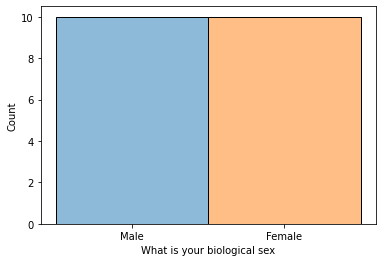

In [11]:
print(demographic.groupby(['What is your biological sex']).size()) 
sns.histplot(x = 'What is your biological sex', data= demographic, hue = 'What is your biological sex', legend = False)

We will be merging the data sets together to match up the response times with the demographic information. This will allow us to have a single dataset that will be accessable. We are merging at the User_ID number.

In [12]:
df = pd.merge(left=demographic, right=response,
              left_on='Please enter a 4 digit, User ID between 1000 and 9999', 
              right_on='User ID#')
df.head()

,What is your biological sex,What gender do you identify as?,Ethnicity,How old are you?,How familiar are you with technology?,"Please enter a 4 digit, User ID between 1000 and 9999",User ID#,Method used for Test,Round 1,Round 2,Round 3,Round 4,Round 5
0,Male,Male,Black or African American,15-24,10,4973,4973,Mouse,0.325000,0.267000,0.301000,0.229,0.267000
1,Male,Male,Black or African American,15-24,10,4973,4973,Spacebar,0.331990,0.232999,0.267000,0.231,0.300000
2,Male,Male,Black or African American,15-24,10,4973,4973,Touchscreen,0.298999,0.265990,0.290000,0.266,0.298999
3,Male,Male,Asian,25-44,10,3007,3007,Mouse,0.362000,0.322000,0.362000,0.329,0.329000
4,Male,Male,Asian,25-44,10,3007,3007,Spacebar,0.328999,0.331000,0.296999,0.331,0.269990


Check the shape to make sure the merge worked.

In [13]:
df.shape

(61, 13)

If you got the same number of rows as the response dataframe and columns equal to the sum of the two dataframes, everything worked flawlessly. If not more investigation is needed. 

We are now going to drop one instance of the user ID number as the dupicate is not needed for anything further. 

In [14]:
df = df.drop(columns = 'Please enter a 4 digit, User ID between 1000 and 9999')
df.head()

,What is your biological sex,What gender do you identify as?,Ethnicity,How old are you?,How familiar are you with technology?,User ID#,Method used for Test,Round 1,Round 2,Round 3,Round 4,Round 5
0,Male,Male,Black or African American,15-24,10,4973,Mouse,0.325000,0.267000,0.301000,0.229,0.267000
1,Male,Male,Black or African American,15-24,10,4973,Spacebar,0.331990,0.232999,0.267000,0.231,0.300000
2,Male,Male,Black or African American,15-24,10,4973,Touchscreen,0.298999,0.265990,0.290000,0.266,0.298999
3,Male,Male,Asian,25-44,10,3007,Mouse,0.362000,0.322000,0.362000,0.329,0.329000
4,Male,Male,Asian,25-44,10,3007,Spacebar,0.328999,0.331000,0.296999,0.331,0.269990


In [15]:
df.shape

(61, 12)

## Check for NA/Null and Zero values

In [16]:
df.isnull().sum()

What is your biological sex               0
What gender do you identify as?           0
Ethnicity                                 0
How old are you?                          0
How familiar are you with technology?     0
User ID#                                  0
Method used for Test                      0
Round 1                                   0
Round 2                                   0
Round 3                                   0
Round 4                                   0
Round 5                                   0
dtype: int64

In [17]:
df.isna().sum()

What is your biological sex               0
What gender do you identify as?           0
Ethnicity                                 0
How old are you?                          0
How familiar are you with technology?     0
User ID#                                  0
Method used for Test                      0
Round 1                                   0
Round 2                                   0
Round 3                                   0
Round 4                                   0
Round 5                                   0
dtype: int64

## Transform the data
We are going to melt the columns into rows so that there is only one column that records the response variable of reaction time time. First, we need to get all of the column names. 

In [18]:
df.columns.values.tolist()

['What is your biological sex',
 'What gender do you identify as?',
 'Ethnicity',
 'How old are you? ',
 'How familiar are you with technology? ',
 'User ID#',
 'Method used for Test',
 'Round 1',
 'Round 2',
 'Round 3',
 'Round 4',
 'Round 5']

This will condense all of the rounds 1-5 into one column. To make sure everything works we need to know how many methods there are and how many rounds there are.

In [19]:
set(df['Method used for Test'])

{'Mouse', 'Spacebar', 'Touchscreen'}

In [20]:
len(set(df['Method used for Test']))

3

Since there are currently 3 methods and 5 rounds we would expect each user id to have a total of 15 reaction times recorded. We will confirm this after the melt. 

In [21]:
df_melt = pd.melt(df.reset_index(),
                  id_vars    = df.columns.values.tolist()[0:7], 
                  value_vars = df.columns.values.tolist()[7:12],
                  var_name   = 'round',
                  value_name = 'time')

df_melt[df_melt['User ID#'] == 4973] 

,What is your biological sex,What gender do you identify as?,Ethnicity,How old are you?,How familiar are you with technology?,User ID#,Method used for Test,round,time
0,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 1,0.325000
1,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 1,0.331990
2,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 1,0.298999
61,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 2,0.267000
62,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 2,0.232999
63,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 2,0.265990
122,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 3,0.301000
123,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 3,0.267000
124,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 3,0.290000
183,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 4,0.229000


In [22]:
df_melt[df_melt['User ID#'] == 4973]['time'].count()

15

They do. This melt has worked!

In [23]:
df_melt.shape

(305, 9)

Rename the columns for easier refrencing in later work. 

In [24]:
df_melt.columns = ['sex', 'gender', 'ethnicity', 'age', 'tech_level', 'user_id', 'method', 'round', 'time']
df_melt[df_melt['user_id'] == 4973] 

,sex,gender,ethnicity,age,tech_level,user_id,method,round,time
0,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 1,0.325000
1,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 1,0.331990
2,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 1,0.298999
61,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 2,0.267000
62,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 2,0.232999
63,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 2,0.265990
122,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 3,0.301000
123,Male,Male,Black or African American,15-24,10,4973,Spacebar,Round 3,0.267000
124,Male,Male,Black or African American,15-24,10,4973,Touchscreen,Round 3,0.290000
183,Male,Male,Black or African American,15-24,10,4973,Mouse,Round 4,0.229000


In [25]:
df_melt.shape

(305, 9)

Export to excel for later use.

In [26]:
df_melt.to_excel('reaction_time_cleaned.xlsx', sheet_name='data', index = False)
